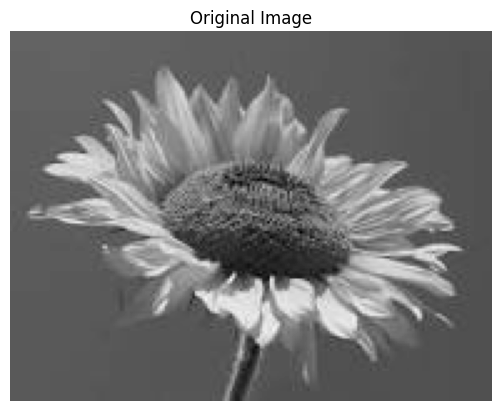

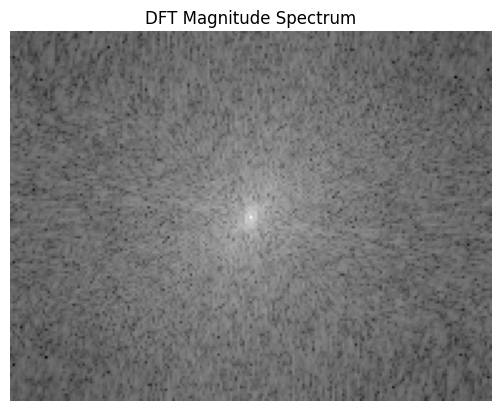

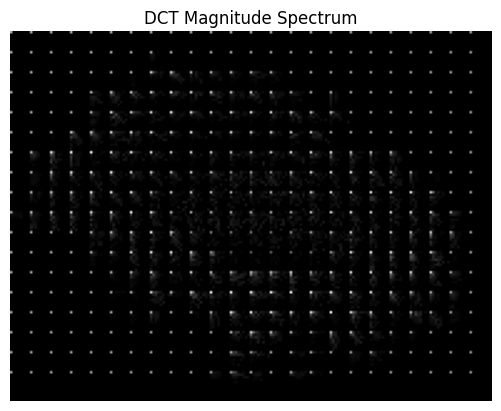

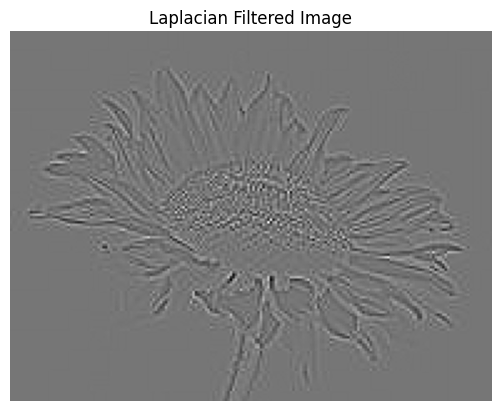

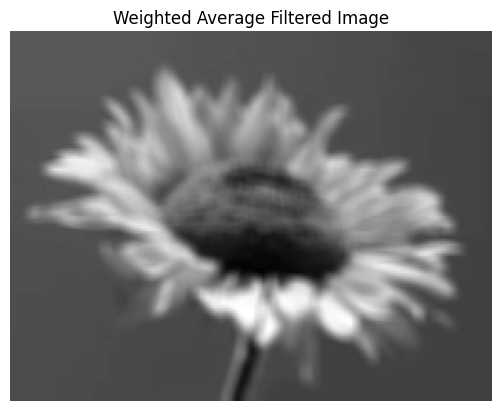

In [4]:
import cv2
import numpy as np
from scipy.fftpack import dct
import matplotlib.pyplot as plt
from PIL import Image

def display_image(title, image):
    """Helper function to display images."""
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()


def compute_dft(image):
    """Compute and display the DFT magnitude spectrum."""
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * \
        np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)
    display_image("DFT Magnitude Spectrum", magnitude_spectrum)


def apply_dct(image_array):
    """Apply block-wise DCT to the image."""
    block_size = 8  # Typically 8x8 blocks are used for DCT
    h, w = image_array.shape  # Get height and width

    dct_image = np.zeros_like(image_array)

    # Apply DCT block by block
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image_array[i:i + block_size, j:j + block_size]
            if block.shape[0] != block_size or block.shape[1] != block_size:
                continue  # Skip blocks that are incomplete
            dct_block = dct(dct(block.T, norm='ortho').T, norm='ortho')
            dct_image[i:i + block_size, j:j + block_size] = dct_block

    return dct_image


def compute_dct(image):
    """Compute and display the DCT magnitude spectrum."""
    # Ensure grayscale image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize image to float range [0, 1]
    image = np.float32(image) / 255.0

    # Apply DCT
    dct_image = apply_dct(image)

    # Visualize the DCT magnitude spectrum
    magnitude_spectrum = np.log(np.abs(dct_image) + 1)
    display_image("DCT Magnitude Spectrum", magnitude_spectrum)
def apply_laplacian(image):
    """Apply the Laplacian filter to the image."""
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    display_image("Laplacian Filtered Image", laplacian)


def apply_weighted_average(image):
    """Apply a weighted average (smoothing) filter to the image."""
    kernel = np.ones((5, 5), np.float32) / 25
    smoothed = cv2.filter2D(image, -1, kernel)
    display_image("Weighted Average Filtered Image", smoothed)
image_path = "/content/sunflower.jpeg"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
display_image("Original Image", image)

# Perform tasks
compute_dft(image)
compute_dct(image)
apply_laplacian(image)
apply_weighted_average(image)